# Kansverdelingen


In dit notebook vind je de opdrachten over kansverdeling.
- <a href="#kv_opdracht1"> Opdracht 1 </a> maak je ter voorbereiding op het college.
- <a href="#kv_opdracht2"> Opdracht 2 </a> maken we in het college.

<a id="kv_opdracht1"></a>
## Opdracht 1

In [122]:
import numpy as np
import scipy.stats as stats

## Voorbeeld - bananen 
Gegeven is een kansverdeling voor het gewicht van bananen met de volgende eigenschappen:
- µ = ‘mu’ = gemiddelde = 50 gr
- σ = ‘sigma’ = standaard deviatie = 7,5 gram

Voor normaalverdeling gelden de volgende regels:

Bij 90% hoort -/+ 1,64 σ

Bij 95% hoort -/+ 1,96 σ

Bij 99% hoort -/+ 2,58 σ

Bepaal met de hand: 
- 90% weegt tussen de …… en …... gram
- 99% weegt tussen de …… en …… gram 
- 5% weegt meer dan …… gram
- 5% weegt minder dan …… gram
- 95% weegt minder dan …… gram

In [123]:
mu, sigma = 50, 7.5
nv = stats.norm(loc=mu,scale=sigma)
print(f'90% weegt tussen de {nv.ppf(0.05)} en {nv.ppf(0.95)} gram. ')
print(f'99% weegt tussen de {nv.ppf(0.005)} en {nv.ppf(0.995)} gram. ')
print(f'5% weegt meer dan {nv.ppf(0.95)} gram. ')
print(f'5% weegt minder dan {nv.ppf(0.05)} gram. ')
print(f'95% weegt minder dan {nv.ppf(0.95)} gram. ')

90% weegt tussen de 37.66359779786396 en 62.33640220213604 gram. 
99% weegt tussen de 30.681280223383244 en 69.31871977661675 gram. 
5% weegt meer dan 62.33640220213604 gram. 
5% weegt minder dan 37.66359779786396 gram. 
95% weegt minder dan 62.33640220213604 gram. 


Hieronder zie je een voorbeeld van hoe je kansen kunt berekenen met behulp van scipy

In [124]:
# Berekening van waarde naar kans met scipy
mu, sigma = 50, 7.5

# scipy.stats functies
nv = stats.norm(loc=mu,scale=sigma)
print(nv.cdf(mu - 1.96*sigma))   # 35,3 gram
print(nv.cdf(mu + 1.96*sigma))   # 64,7 gram
print(nv.cdf(mu + 1.96*sigma) - nv.cdf(mu - 1.96*sigma)) # tussen 35,3 en 64,7 gram

0.024997895148220397
0.9750021048517796
0.9500042097035593


Kansverdeling bananen, met µ = 50 gram en σ = 7,5 gram

Bereken met de functies van `scipy.stats`:

- 5% weegt minder dan ... gram
- de middelste 90% weegt tussen de ... en ... gram
- het derde kwart weegt tussen de ... en ... gram
- ...% weegt meer dan 40 gram
- ...% weegt tussen de 61 en 73 gram

In [125]:
print(nv.ppf(0.05))
print(f'De middelse 90% weegt tussem de {nv.ppf(0.05)} en {nv.ppf(0.05)} gram. ')
print(f'Het derde kwart weegt tussem de {nv.ppf(0.5)} en {nv.ppf(0.75)} gram. ')
print(f'{(1-nv.cdf(40))*100}% weegt meer dan 40 gram.')
print(f'{((1-nv.cdf(61))*100) - ((1-nv.cdf(73))*100)}% weegt meer dan 40 gram.')

37.66359779786396
De middelse 90% weegt tussem de 37.66359779786396 en 37.66359779786396 gram. 
Het derde kwart weegt tussem de 50.0 en 55.05867312647061 gram. 
90.87887802741321% weegt meer dan 40 gram.
7.015107693259292% weegt meer dan 40 gram.


<a id = "kv_opdracht2"></a>
## Opdracht 2 - toetsuitslagen


In deze opdracht gaan we de toetsuitslagen analyseren van het eerstejaarsvak Programming (PROG).

De tentamenuitslagen zijn beschikbaar gesteld in een Excelbestand: uitslag_prog.xlsx

### Deel 1. Libraries importeren

We zullen voor de analyses gebruik maken van `pandas` en `matplotlib`. Importeer hiervoor de juiste biblioteheken.
Matplotlib is standaard geinstalleerd als je Anaconda gebruikt. In de overige gevallen kun je Matplotlib als volgt installeren:

1. Open een terminal: Win+R -> cmd -> enter: pip install matplotlib
2. Installeer via de anaconda package manager: conda install matplotlib

Je kunt natuurlijk ook in Google Colab werken: dan hoef je niks te installeren

In [126]:
# Bibliotheken
from datetime import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

### Deel 2. Analyse dataset
In dit deel gaan we de data ophalen, een aantal zaken aanpassen en de eerste analyses uitvoeren.


- Importeer de dataset in een geschikt dataframe en beschrijf de dataset:
  * Wat zijn de dimensies van het dataframe? Wat betekenen deze getallen? **Tip**: gebruik de shape functie
  * Wat is de betekenis van de attributen in het dataframe? **Tip**: gebruik de head() functie
  * Wat zijn de datatypes voor de attributen (nominaal/categoriaal/discreet/continue)? **Tip**: gebruik de dtypes functie maar denk ook zelf na!

In [127]:
# Importeer datasets
uitslag_prog = pd.read_excel("uitslag_prog.xlsx")
uitslag_prog
# Merk op: mogelijk krijg je foutmeldingen, lees deze goed want de oplossing is vaak simpel

,StudentNummer,Eindtijd,Score,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,...,Score.30,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39
0,8751631,2016-10-13 13:24:46.000,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
1,4897318,2016-10-13 13:06:16.000,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,7749231,2016-10-13 13:06:39.000,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,2170653,2016-10-13 11:11:01.000,0,0,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,0
4,5540046,2016-10-13 13:22:07.000,1,0,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1125404,2016-10-13 10:54:48.000,0,0,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
449,8552327,2016-10-13 11:08:35.000,1,0,1,1,1,1,1,0,...,0,1,1,0,1,1,1,1,1,1
450,6831151,2016-10-13 13:17:02.000,0,0,0,0,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
451,4305117,2016-10-13 14:04:10.000,1,0,1,1,0,1,1,1,...,0,0,1,0,1,1,1,1,0,1


De getallen betekenen dat er 453 studenten zijn waarbij ze 40 vragen hebben beantwoord. want de eerste 2 rijen zijn studentnummer en de eindtijd. 
De datatype van de scores zijn nominaal,student nummer is nominaal want er is geen volgorde en is om ze te onderscheiden. En eindtijd is ordinaal, want er is een volgorde in tijd en je kunt bijv de maanden categoriseren.

In [128]:
uitslag_prog.shape

(453, 42)

***Tip 1: schoon niet alleen de inhoud van de data op, maar ook de labels / namen***

De Excel-file bevatte dezelfde header-name voor alle scores. De importer heeft dit voor je opgelost door duplicate header-namen te nummeren. Nadeel is echter dat de eerste zelf geen nummer heeft. Manipuleer de headers zodat de telling begint met Score.1 ipv. Score (merk op dat Score.1 dan hernoemt moet worden naar Score.2, etc.). Toon hierna de eerste 10 regels van het dataframe.




In [129]:
# Code voor het hernoemen
columns=lambda x: x[1:]

replacements = {"Score." + str(i) : "Score." + str(i+1)  for i in range(1, 40)}
replacements["Score"] = "Score.1"

In [130]:
# Hernoemen van de columns van het dataframe
uitslag_prog.rename(columns=replacements, inplace=True)

In [131]:
uitslag_prog.head()

,StudentNummer,Eindtijd,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,Score.8,...,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39,Score.40
0,8751631,2016-10-13 13:24:46.000,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
1,4897318,2016-10-13 13:06:16.000,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,7749231,2016-10-13 13:06:39.000,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
3,2170653,2016-10-13 11:11:01.000,0,0,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,0
4,5540046,2016-10-13 13:22:07.000,1,0,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1


Het datatype van kolom 'eindtijd' zou overduidelijk een tijdstip moeten zijn, maar `dtypes` geeft aan dat het een object is. Converteer deze kolom naar een datetime. **Tip**: gebruik `to_datetime()` van Pandas. Controleer jouw actie met de `info()` functie.

In [132]:
uitslag_prog['Eindtijd'] = pd.to_datetime(uitslag_prog['Eindtijd'])

In [133]:
uitslag_prog.dtypes

StudentNummer             int64
Eindtijd         datetime64[ns]
Score.1                   int64
Score.2                   int64
Score.3                   int64
Score.4                   int64
Score.5                   int64
Score.6                   int64
Score.7                   int64
Score.8                   int64
Score.9                   int64
Score.10                  int64
Score.11                  int64
Score.12                  int64
Score.13                  int64
Score.14                  int64
Score.15                  int64
Score.16                  int64
Score.17                  int64
Score.18                  int64
Score.19                  int64
Score.20                  int64
Score.21                  int64
Score.22                  int64
Score.23                  int64
Score.24                  int64
Score.25                  int64
Score.26                  int64
Score.27                  int64
Score.28                  int64
Score.29                  int64
Score.30

Bepaal een paar statistieken van de dataset met de `describe()` functie. Wat betekenen deze getallen?


In [134]:
uitslag_prog.describe()

,StudentNummer,Eindtijd,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,Score.8,...,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39,Score.40
count,4.530000e+02,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,5.380351e+06,2016-10-13 12:15:20.081677568,0.381898,0.273731,0.624724,0.768212,0.754967,0.657837,0.810155,0.426049,...,0.730684,0.772627,0.673289,0.653422,0.836645,0.706402,0.935982,0.790287,0.406181,0.876380
min,1.024103e+06,2016-10-13 10:29:51,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.014301e+06,2016-10-13 11:06:13,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,5.110934e+06,2016-10-13 12:52:38,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,7.899777e+06,2016-10-13 13:09:51,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.960037e+06,2016-10-13 14:04:56,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,2.688709e+06,NaN,0.486389,0.446365,0.484729,0.422441,0.430582,0.474958,0.392612,0.495048,...,0.444095,0.419599,0.469529,0.476406,0.370098,0.455914,0.245055,0.407554,0.491662,0.329512


StudentNummer wordt behandeld als een continue getal, maar eigenlijk zou het type nominaal moet zijn. Converteer het type van StudentNummer naar Categorial m.b.v. `astype`. Voer nu nogmaals `describe()` uit. Wat is er veranderd?


Aangezien StudentNummer geen kwantitatieve meetniveau is kan er geen wiskundige functies op toegepast worden waardoor het niet meer in de .discribe() functie voorkomt.

In [135]:
uitslag_prog['StudentNummer'] = uitslag_prog['StudentNummer'].astype('category')
uitslag_prog.describe()

,Eindtijd,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,Score.8,Score.9,...,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39,Score.40
count,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,2016-10-13 12:15:20.081677568,0.381898,0.273731,0.624724,0.768212,0.754967,0.657837,0.810155,0.426049,0.706402,...,0.730684,0.772627,0.673289,0.653422,0.836645,0.706402,0.935982,0.790287,0.406181,0.876380
min,2016-10-13 10:29:51,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-10-13 11:06:13,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,2016-10-13 12:52:38,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2016-10-13 13:09:51,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2016-10-13 14:04:56,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.486389,0.446365,0.484729,0.422441,0.430582,0.474958,0.392612,0.495048,0.455914,...,0.444095,0.419599,0.469529,0.476406,0.370098,0.455914,0.245055,0.407554,0.491662,0.329512


***Tip 2: visualisaties helpen bij het analyseren van de data***

Plot een histogram voor het attribuut `Eindtijd` (zorg dat de labels op de assen niet overlappen). Beschrijf de verdeling (scheef? multimodaal? normaal?). Verklaar wat je ziet.

<AxesSubplot:>

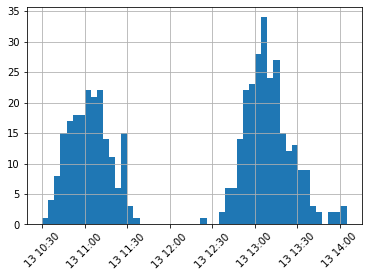

In [136]:
uitslag_prog.Eindtijd.hist(bins=50, xrot=45)

Beschrijf de verdeling (scheef? multimodaal? normaal?). Verklaar wat je ziet.

Mulitmodaal, want er zijn twee pieken, beide normaal verdelingen lijken rechtsscheef, dat komt omdat je niet 0 tijd besteed kan hebben.

### Deel 3. Analyse attributen met behulp van centrummaten

In dit deel zullen we de vragen van het tentamen analyseren met behulp van de centrummaten

Bereken het gemiddelde van de score van elke vraag en sorteer de waardes van hoog naar laag. **Tip**: ga niet zelf code schrijven om deze berekeningen uit te voeren maar maak gebruik van de standaardfuncties van Pandas! 
  

In [137]:
gem = uitslag_prog.loc[:, uitslag_prog.dtypes == 'int64'].mean().sort_values(ascending=False)
gem

Score.16    0.973510
Score.37    0.935982
Score.40    0.876380
Score.21    0.847682
Score.35    0.836645
Score.7     0.810155
Score.38    0.790287
Score.32    0.772627
Score.27    0.772627
Score.17    0.772627
Score.4     0.768212
Score.22    0.759382
Score.5     0.754967
Score.31    0.730684
Score.23    0.719647
Score.26    0.715232
Score.15    0.706402
Score.36    0.706402
Score.9     0.706402
Score.12    0.706402
Score.33    0.673289
Score.6     0.657837
Score.34    0.653422
Score.29    0.653422
Score.18    0.640177
Score.14    0.631347
Score.3     0.624724
Score.11    0.602649
Score.10    0.598234
Score.28    0.582781
Score.25    0.434879
Score.8     0.426049
Score.39    0.406181
Score.24    0.390728
Score.1     0.381898
Score.13    0.355408
Score.30    0.300221
Score.2     0.273731
Score.19    0.273731
Score.20    0.165563
dtype: float64

Plot het gemiddelde per vraag in een barchart en daarna in een linechart. **Tip**: maak gebruik van de `plot()` functie van een Pandas dataframe.

<AxesSubplot:>

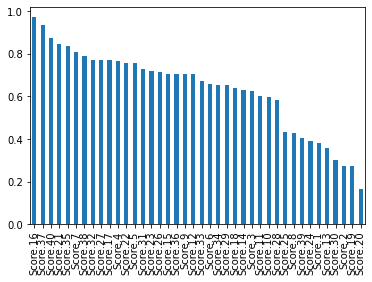

In [138]:
gem.plot(kind='bar')

Bereken de mediaan. 
- Wat kun je zeggen over de mean van een vraag als je de mediaan weet? Is de mean bijvoorbeeld altijd hoger of lager dan een bepaalde waarde gegeven de mediaan? 
- Is deze relatie er altijd?   

Als de vraag gemiddeld hoger dan 0.5 is, dan is de mediaan 1. Deze relatie is er alleen als de mogelijke waardes 0 of 1 zijn.

<AxesSubplot:>

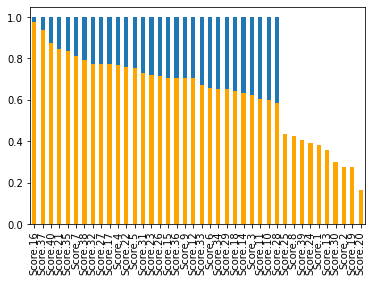

In [139]:
med = uitslag_prog.loc[:, uitslag_prog.dtypes == 'int64'].median().sort_values(ascending=False)
med.plot(kind='bar')
gem.plot(kind='bar', color='orange')

Bereken de modus. 
- Waarom zie je voor deze centrummaat wél StudentNummer als kolom terug in het resultaat? 
- Waarom zie je meerdere rijen?
- Waarom bevatten sommige cellen NaN?

De modus verteld wat het meeste van iets voorkomt, dit kan ook bij catogorien waardoor StudentNummer ook terug komt.
Omdat elk StudentNummer unieks is, is elk nummer een modus waardoor alles studentnummers voorkomen en dat verklaart waarom er zoveel rijen zijn.
De meeste cellen hebben geen nummer omdat de modus van de scores altijd hetzelfde zijn en niet verschillen per student, daarom staan de modus per score in de eerst rij.

In [140]:
mod = uitslag_prog.mode()
mod

,StudentNummer,Eindtijd,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,Score.8,...,Score.31,Score.32,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39,Score.40
0,1024103,2016-10-13 11:01:24,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1033850,2016-10-13 11:05:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1056270,2016-10-13 11:06:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1056963,2016-10-13 11:08:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1083292,2016-10-13 12:56:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,9838669,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,9853937,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,9855088,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,9888215,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Deel 4. Analyse attributen met behulp van spreidingsmaten
We gaan verder met het analyseren van de vragen, maar nu met behulp van enkele spreidingsmaten.

Bereken de variantie van elke vraag. Sorteer deze waardes.
- Wat zegt dit getal?
- Wat voor *kwalitatieve* uitspraak kun je doen over een vraag als de variantie hoog is?

De variantie geeft de spreiding van een vraag aan, hiermee kan je dus zeggen dat als een student de vragen met hoge variantie goed hebben beter zijn dan de studenten die die vragen fout hebben.

In [141]:
uitslag_prog.loc[:,'Score.1':'Score.40'].var().sort_values()

Score.16    0.025845
Score.37    0.060052
Score.40    0.108578
Score.21    0.129403
Score.35    0.136973
Score.20    0.138457
Score.7     0.154144
Score.38    0.166100
Score.32    0.176063
Score.27    0.176063
Score.17    0.176063
Score.4     0.178456
Score.22    0.183125
Score.5     0.185401
Score.31    0.197220
Score.2     0.199242
Score.19    0.199242
Score.23    0.202202
Score.26    0.204126
Score.12    0.207857
Score.15    0.207857
Score.9     0.207857
Score.36    0.207857
Score.30    0.210553
Score.33    0.220458
Score.6     0.225586
Score.34    0.226963
Score.29    0.226963
Score.13    0.229600
Score.18    0.230860
Score.14    0.233263
Score.3     0.234963
Score.1     0.236574
Score.24    0.238586
Score.11    0.239993
Score.10    0.240882
Score.39    0.241732
Score.28    0.243685
Score.8     0.245072
Score.25    0.246303
dtype: float64

Bereken de standaard deviatie. 
- Hoe verschilt deze maat van de variantie? 
- Is er een verband tussen de standaard deviatie en variantie? Welke van beide maten is intuitiever?

standaarddeviatie heeft dezelfde eenheid als de originele scores. 
De variantie is het gekwadrateerd standdaardsdeviatie, er is daarom ook een verband tussen de deviatie en variantie

In [142]:
uitslag_prog.loc[:,'Score.1':'Score.40'].std().sort_values()

Score.16    0.160765
Score.37    0.245055
Score.40    0.329512
Score.21    0.359726
Score.35    0.370098
Score.20    0.372099
Score.7     0.392612
Score.38    0.407554
Score.32    0.419599
Score.27    0.419599
Score.17    0.419599
Score.4     0.422441
Score.22    0.427931
Score.5     0.430582
Score.31    0.444095
Score.2     0.446365
Score.19    0.446365
Score.23    0.449668
Score.26    0.451803
Score.12    0.455914
Score.15    0.455914
Score.9     0.455914
Score.36    0.455914
Score.30    0.458861
Score.33    0.469529
Score.6     0.474958
Score.34    0.476406
Score.29    0.476406
Score.13    0.479166
Score.18    0.480479
Score.14    0.482973
Score.3     0.484729
Score.1     0.486389
Score.24    0.488453
Score.11    0.489891
Score.10    0.490797
Score.39    0.491662
Score.28    0.493645
Score.8     0.495048
Score.25    0.496289
dtype: float64

Hieronder wordt de gemiddelde score per vraag geplot (als *bars*) en daarnaast de standaarddeviatie (als lijn).
- Is er op het oog een verband tussen de centrummaat en de spreidingsmaat?

Ja, als de standaarddeviatie groot is, is de score laag en andersom.

In [143]:
# Visualisatie 1
# uitslag_prog.loc[:,'Score_1':'Score_40'].mean().sort_values().plot.bar(yerr=uitslag_prog.loc[:,'Score_1':'Score_40'].std(), width = 0.9, figsize=(14, 6))

<AxesSubplot:>

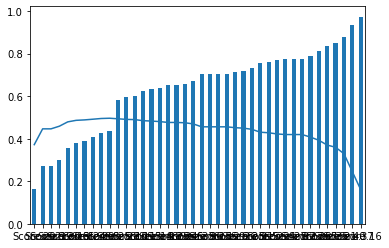

In [144]:
# Visualisatie 2
means = uitslag_prog.loc[:,'Score.1':'Score.40'].mean()
stds = uitslag_prog.loc[:,'Score.1':'Score.40'].std()
means_stds = pd.concat([means, stds], axis=1)

means_stds.sort_values(by=0, inplace=True)

means_stds[0].plot(kind='bar')
means_stds[1].plot(kind='line')

## Deel 5. Analyse van studenten
In deel 3 en 4 hebben we de kolommen (attributen) geanalyseerd, nu gaan we de rijen (de verschillende studenten in de dataset) analyseren.

Bepaal de gemiddelde scores per student en toon de hoogstscorende eerst. 
- **Tip 1**: we hebben de `mean` functie hiervoor gebruikt om het gemiddelde van kolommen te berekenen, nu wil je eigenlijk het gemiddelde van rijen berekenen... zoek naar de inputparameter voor de `mean` functie waarmee je dit makkelijk kunt fixen! 
- **Tip 2**: als je een gemiddelde krijgt groter dan 1, kijk dan goed naar welke kolommen je als input mee geeft

In [145]:
uitslag_prog.loc[:,'Score.1':'Score.40'].mean(axis=1).sort_values(ascending=False)

417    1.000
232    0.975
50     0.950
314    0.950
146    0.950
       ...  
23     0.250
369    0.250
381    0.250
113    0.225
2      0.175
Length: 453, dtype: float64

***Tip 3: het kan handig zijn om zelf de dataset uit te breiden met nieuwe informatie***

Onderstaande code berekent het cijfer voor elke student. Hierbij wordt rekening gehouden met de *cesuur* (= gokkans):
  1. cijfer = $\frac{9}{30}(\sum_{i=1}^{40}{Score.i}-10) + 1$
  2. eindcijfer = $\max(1, cijfer)$.

In [146]:
uitslag_prog['Cijfer'] = (9/30)*(uitslag_prog.loc[:,'Score.1':'Score.40'].sum(axis = 1) - 10) + 1
uitslag_prog['Eindcijfer'] = np.maximum( uitslag_prog['Cijfer'], [1]*uitslag_prog.shape[0] )
uitslag_prog

,StudentNummer,Eindtijd,Score.1,Score.2,Score.3,Score.4,Score.5,Score.6,Score.7,Score.8,...,Score.33,Score.34,Score.35,Score.36,Score.37,Score.38,Score.39,Score.40,Cijfer,Eindcijfer
0,8751631,2016-10-13 13:24:46,0,0,0,1,0,0,1,1,...,1,0,0,0,1,1,0,0,2.2,2.2
1,4897318,2016-10-13 13:06:16,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,8.2,8.2
2,7749231,2016-10-13 13:06:39,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0.1,1.0
3,2170653,2016-10-13 11:11:01,0,0,1,1,1,0,1,0,...,1,1,1,1,1,1,0,0,4.9,4.9
4,5540046,2016-10-13 13:22:07,1,0,1,1,1,1,1,0,...,1,1,1,0,1,1,1,1,7.3,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1125404,2016-10-13 10:54:48,0,0,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,5.5,5.5
449,8552327,2016-10-13 11:08:35,1,0,1,1,1,1,1,0,...,1,0,1,1,1,1,1,1,7.6,7.6
450,6831151,2016-10-13 13:17:02,0,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,1,5.5,5.5
451,4305117,2016-10-13 14:04:10,1,0,1,1,0,1,1,1,...,1,0,1,1,1,1,0,1,6.1,6.1


Bepaal het totale gemiddelde over alle studenten. Doe dit nogmaals, maar dan alleen de studenten die een voldoende hebben gescoord.

In [147]:
uitslag_prog['Eindcijfer'].mean()

5.619205298013245

In [148]:
uitslag_prog.loc[uitslag_prog['Eindcijfer'] >= 5.5, 'Eindcijfer'].mean()

6.965168539325843

Plot een histogram van de eindcijfers met de `plot.hist()` functie van een dataframe. Met Matplotlib kan het *fancier*, maar dat komt later! Wat kun je zeggen over de verdeling (scheef? multimodaal? normaal?) En voor cijfer?

Normaalverdeling

<AxesSubplot:ylabel='Frequency'>

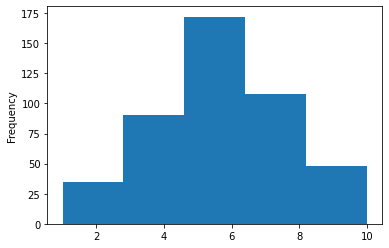

In [149]:
uitslag_prog['Eindcijfer'].plot.hist(bins=5)

Laten we aannemen dat de cijfers normaal verdeeld zijn. Bepaal de parameters van een normaalverdeling voor de eindcijfers van alle studenten.


Een normaalverdeling wordt beschreven door 2 parameters:  
1. Het gemiddelde $\mu$  
2. De standaarddeviatie $\sigma$

Als we de cijferdistributie willen benaderen met een normaalverdeling, dan geldt:
1. $\mu = $ uitslag_prog.Cijfer.mean()
2. $\sigma = $ uitslag_prog.Cijfer.std()

Sla het gemiddelde op als `mu_cijfers` en de standaarddeviatie als `sigma_cijfers` en run dan onderstaande code de normaalverdeling als formule (`normal_cijfers`) te genereren en om deze normaalverdeling te visualiseren. In de visualisatie worden ook de originele gegevens getoond, je ziet dat er *bijna* sprake is van een normaalverdeling.

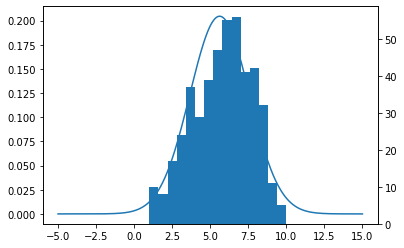

In [150]:
# Geef deze variabelen de correcte waarde
mu_cijfers = uitslag_prog.Cijfer.mean()
sigma_cijfers = uitslag_prog.Cijfer.std()

# Pas deze code niet aan
normal_cijfers = sp.stats.norm(mu_cijfers, sigma_cijfers)
x = np.linspace(-5,15,1000)
y = normal_cijfers.pdf(x)

fig, ax1 = plt.subplots()
ax1.plot(x,y)
ax2 = ax1.twinx()
ax2.hist(uitslag_prog.Eindcijfer, bins=15)
plt.show()

Bereken:
 * $\Pr(C < 6)$. **Tip**: gebruik `normal_cijfers` en de functie `cdf()` 
 * $\Pr(C > 8,5)$
 * $\Pr(C > 10)$. Leg uit waarom dit groter dan 0 is.
 * $\Pr(6 < C < 8,5)$.
 * $\Pr(C < 6 \lor C > 8,5) \>$ ($\lor$ is wiskundige notatie voor OR)


In [151]:
normal_cijfers.cdf(6)

0.5779070206029681

In [152]:
1 - normal_cijfers.cdf(8.5)

0.06970807560832215

Omdat het begin en eind van de lijn nooit 0 gaan bereiken.

In [153]:
1 - normal_cijfers.cdf(10)

0.012325614769313709

In [154]:
normal_cijfers.cdf(8.5) - normal_cijfers.cdf(6)

0.3523849037887098

In [155]:
normal_cijfers.cdf(6) + (1 - normal_cijfers.cdf(8.5))

0.6476150962112902

Hier visualiseren we het voorlaatste scenario, gewoon omdat het kan:


C:\Users\peter\AppData\Local\Temp\ipykernel_31792\17194684.py:2: DeprecationWarning: scipy.logical_and is deprecated and will be removed in SciPy 2.0.0, use numpy.logical_and instead
  plt.fill_between(x,y, where=sp.logical_and(x>6, x<8.5))


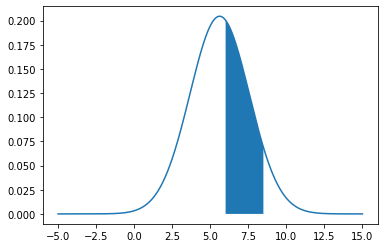

In [156]:
plt.plot(x,y)
plt.fill_between(x,y, where=sp.logical_and(x>6, x<8.5))
plt.show()

Welk cijfer moet je minimaal hebben om bij de top 10% van de klas te behoren?


In [160]:
normal_cijfers.ppf(0.9)

8.116799870355244